<a href="https://colab.research.google.com/github/jojosam90/ltsm/blob/main/Multivariate%20Time%20Series%20Modeling%20using%20LSTM_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
#from google.colab import drive
#drive.mount('/content/drive')

In [181]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import datetime
import numpy as np
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [182]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv')

In [183]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [184]:
# df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d %H:%M:%S') 
# df['End Date'] = pd.to_datetime(df['End Date'], format='%Y-%m-%d %H:%M:%S')

In [185]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StartDateTime  5081 non-null   object 
 1   Total kWh      5081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.5+ KB


In [187]:
check_nan_in_df = df.isnull()
print (check_nan_in_df)

      StartDateTime  Total kWh
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
...             ...        ...
5076          False      False
5077          False      False
5078          False      False
5079          False      False
5080          False      False

[5081 rows x 2 columns]


In [188]:
df1 = df.dropna()

In [189]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [190]:
# df1['StartDateTime'] = pd.to_datetime(df1['Start Date'].astype(str) + ' ' +df1['Start Time'].astype(str))

In [191]:
# df1['EndDateTime'] = pd.to_datetime(df1['End Date'].astype(str) + ' ' +df1['End Time'].astype(str))

In [192]:
# df1 = df1.drop(columns=['_id','CP ID','Start Date', 'Start Time','End Date','End Time'])
# df1=df1[['StartDateTime','EndDateTime','Connector','Site','Model','Total kWh']]
# df1

In [193]:
# df1['Duration'] = df1['EndDateTime'] - df1['StartDateTime']
# df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'h')

In [194]:
# #df1 = df1.drop(columns=['StartDateTime','EndDateTime'])
# df1 = df1.drop(columns=['EndDateTime','Duration','Site','Model'])
df1=df1[['StartDateTime','Total kWh']]
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [195]:
# delete duplicate rows
df1 = df1.drop_duplicates()

In [196]:
df1["StartDateTime"] = pd.to_datetime(df1["StartDateTime"])

df1 = df1.sort_values(by="StartDateTime")

In [197]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [198]:
#df1[~(df1 == 0).all(axis=1)]

#make sure every hour is in the datetime
#df1 = df1.set_index("StartDateTime").resample("1h").last()
df1 = df1.set_index("StartDateTime").resample("1h").sum()

df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.870
2016-01-09 08:00:00,10.380
2016-01-09 09:00:00,3.580
2016-01-09 10:00:00,8.250
2016-01-09 11:00:00,10.210
...,...
2017-12-08 19:00:00,10.097
2017-12-08 20:00:00,0.000
2017-12-08 21:00:00,13.000


In [199]:
df1.dropna(subset=['Total kWh'], how='all', inplace=True)

In [200]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.870
2016-01-09 08:00:00,10.380
2016-01-09 09:00:00,3.580
2016-01-09 10:00:00,8.250
2016-01-09 11:00:00,10.210
...,...
2017-12-08 19:00:00,10.097
2017-12-08 20:00:00,0.000
2017-12-08 21:00:00,13.000


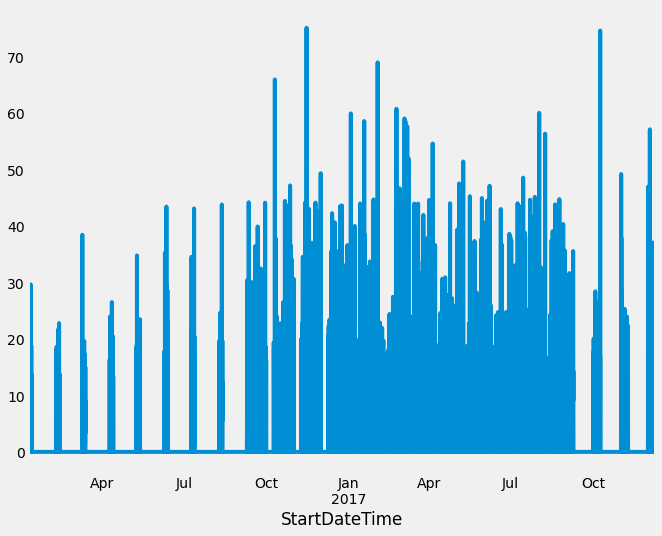

In [201]:
temp = df1['Total kWh']
temp.plot()

In [202]:
df1 = df1[~(df1 == 0).all(axis=1)]

In [203]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.870
2016-01-09 08:00:00,10.380
2016-01-09 09:00:00,3.580
2016-01-09 10:00:00,8.250
2016-01-09 11:00:00,10.210
...,...
2017-12-08 18:00:00,6.570
2017-12-08 19:00:00,10.097
2017-12-08 21:00:00,13.000


In [204]:
df1['Total kWh'].round(3)

StartDateTime
2016-01-09 07:00:00     3.870
2016-01-09 08:00:00    10.380
2016-01-09 09:00:00     3.580
2016-01-09 10:00:00     8.250
2016-01-09 11:00:00    10.210
                        ...  
2017-12-08 18:00:00     6.570
2017-12-08 19:00:00    10.097
2017-12-08 21:00:00    13.000
2017-12-08 22:00:00    19.700
2017-12-08 23:00:00     1.740
Name: Total kWh, Length: 5081, dtype: float64

In [205]:
#df1.to_csv("/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv")

In [206]:
# making data again to remove inconsistencies
temp = df1
dataset = temp['Total kWh'].dropna().values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 25
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [207]:
from tensorflow import keras

from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=200, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)

model.summary()

Epoch 1/200
58/58 [==============================] - 3s 15ms/step - loss: 0.0130 - val_loss: 0.0125
Epoch 2/200
58/58 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.0124
Epoch 3/200
58/58 [==============================] - 0s 5ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 4/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 5/200
58/58 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 6/200
58/58 [==============================] - 0s 8ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 7/200
58/58 [==============================] - 1s 9ms/step - loss: 0.0117 - val_loss: 0.0122
Epoch 8/200
58/58 [==============================] - 1s 9ms/step - loss: 0.0118 - val_loss: 0.0122
Epoch 9/200
58/58 [==============================] - 1s 9ms/step - loss: 0.0117 - val_loss: 0.0122
Epoch 10/200
58/58 [==============================] - 1s 9ms/step - loss: 0.0117 - val_loss: 0.0123
Epoch 11

In [208]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [209]:
mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

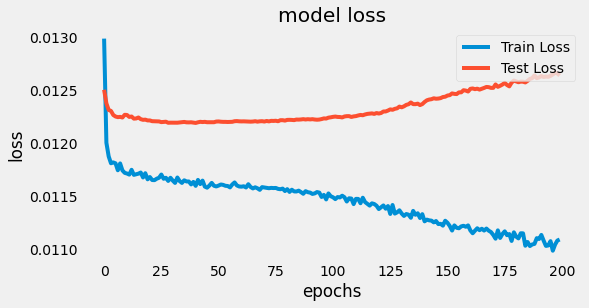

In [210]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

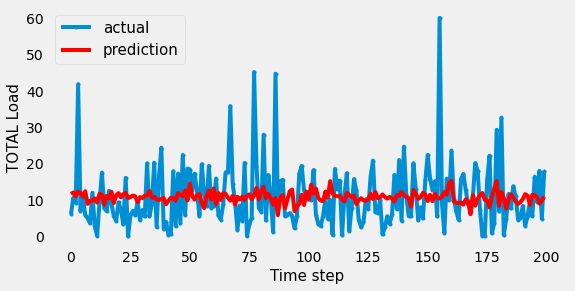

In [211]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [212]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [213]:
pjme = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017_1.csv', index_col=[0], parse_dates=[0])

In [214]:
pjme.head()

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 08:00:00,10.38
2016-01-09 09:00:00,3.58
2016-01-09 10:00:00,8.25
2016-01-09 11:00:00,10.21


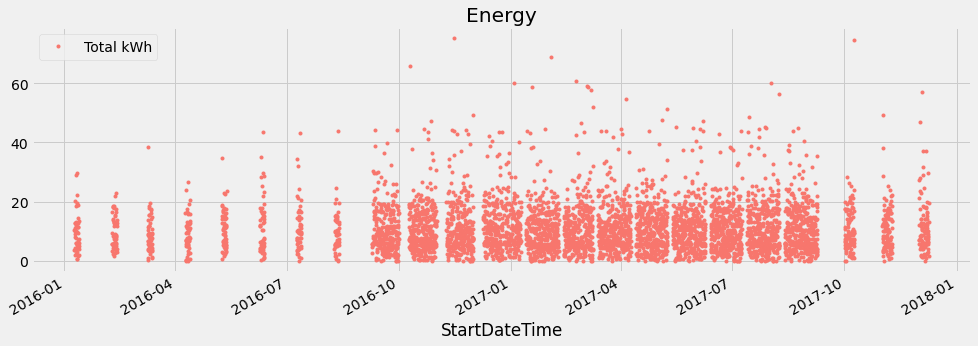

In [215]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='Energy')

In [216]:
split_date = '2017-6-30'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date].copy()

In [217]:
pjme_train.head()

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 08:00:00,10.38
2016-01-09 09:00:00,3.58
2016-01-09 10:00:00,8.25
2016-01-09 11:00:00,10.21


In [218]:
pjme_test.head()

,Total kWh
StartDateTime,
2017-06-30 07:00:00,19.300
2017-06-30 08:00:00,19.187
2017-06-30 09:00:00,5.060
2017-06-30 10:00:00,5.800
2017-06-30 11:00:00,38.140


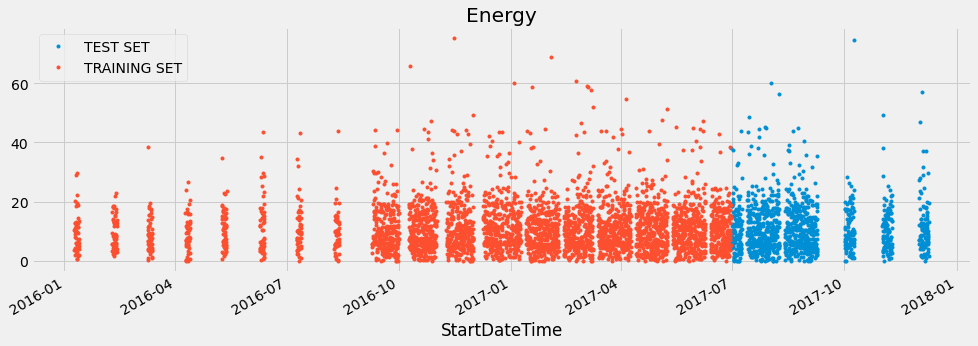

In [219]:
_ = pjme_test \
    .rename(columns={'Total kWh': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'Total kWh': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Energy', style='.')

In [220]:
# Create Time Series Features

def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [221]:
X_train, y_train = create_features(pjme_train, label='Total kWh')
X_test, y_test = create_features(pjme_test, label='Total kWh')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [222]:
# Create XGBoost Model
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

[00:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

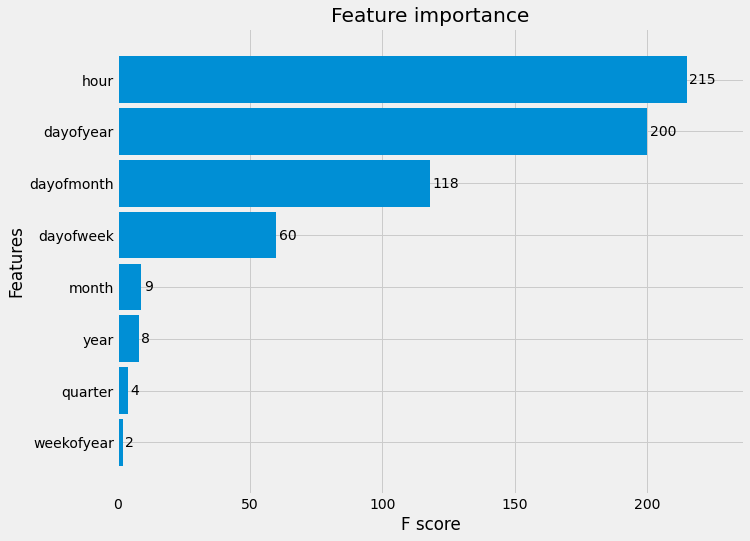

In [223]:
# Features Importance
_ = plot_importance(reg, height=0.9)

In [224]:
# Forecast on test set 
pjme_test['MW_Prediction'] = reg.predict(X_test)
pjme_all = pd.concat([pjme_test, pjme_train], sort=False)

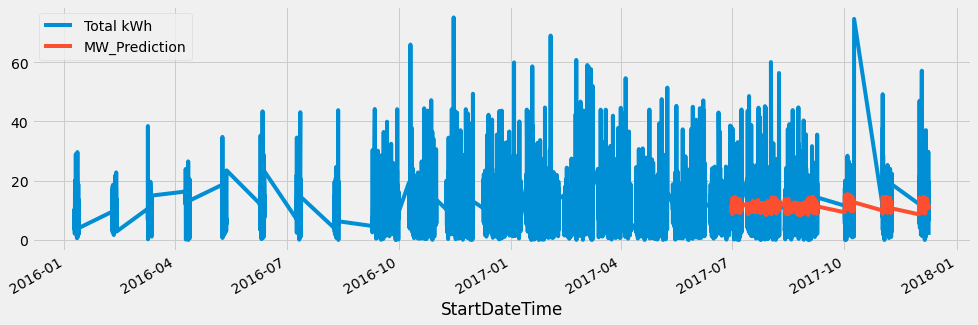

In [225]:
_ = pjme_all[['Total kWh','MW_Prediction']].plot(figsize=(15, 5))

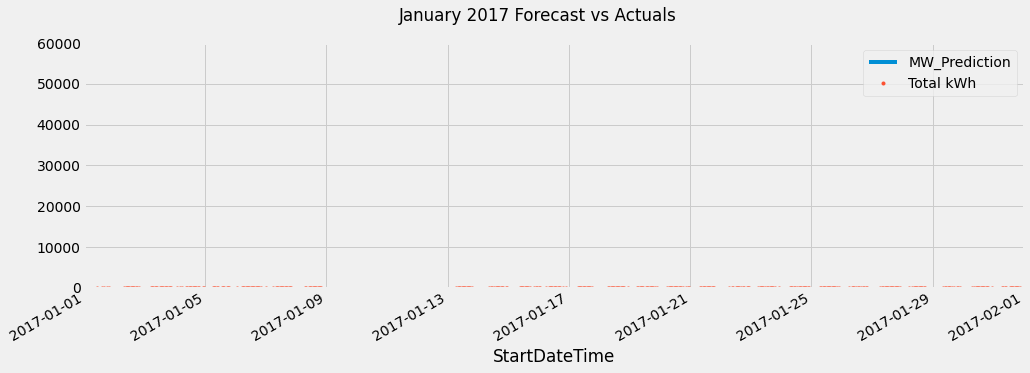

In [226]:
# Look at 1st month prediction

# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = pjme_all[['MW_Prediction','Total kWh']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='01-01-2017', upper='02-01-2017')
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2017 Forecast vs Actuals')

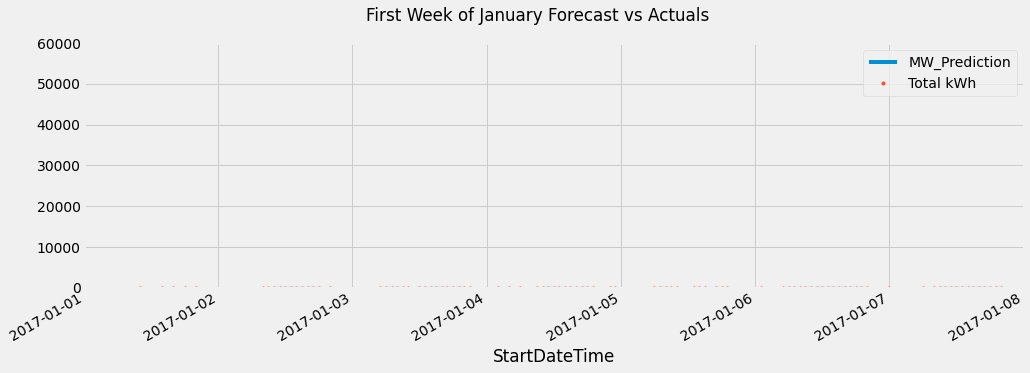

In [227]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = pjme_all[['MW_Prediction','Total kWh']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='01-01-2017', upper='01-08-2017')
ax.set_ylim(0, 60000)
plot = plt.suptitle('First Week of January Forecast vs Actuals')

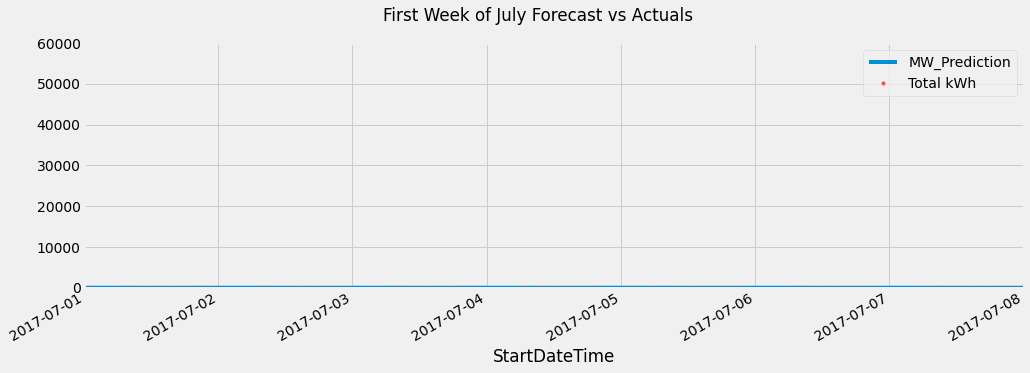

In [228]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = pjme_all[['MW_Prediction','Total kWh']].plot(ax=ax,
                                              style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='07-01-2017', upper='07-08-2017')
plot = plt.suptitle('First Week of July Forecast vs Actuals')

In [229]:
mean_squared_error(y_true=pjme_test['Total kWh'],
                   y_pred=pjme_test['MW_Prediction'])

69.49600527519235

In [230]:
mean_absolute_error(y_true=pjme_test['Total kWh'],
                   y_pred=pjme_test['MW_Prediction'])

6.058065799435043

In [231]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [232]:
mean_absolute_percentage_error(y_true=pjme_test['Total kWh'],
                   y_pred=pjme_test['MW_Prediction'])

1735.0564901832374